In [1]:
import pandas as pd

file_path = 'disney_plus_titles.csv'
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8244\3364667927.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['title'].resample('M').count().plot()


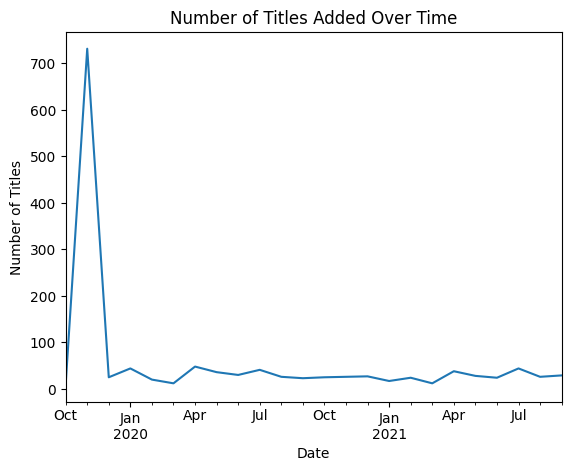

In [2]:
import matplotlib.pyplot as plt

df['date_added'] = pd.to_datetime(df['date_added'])

df.set_index('date_added', inplace=True)

df['title'].resample('M').count().plot()
plt.title('Number of Titles Added Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles')
plt.show()

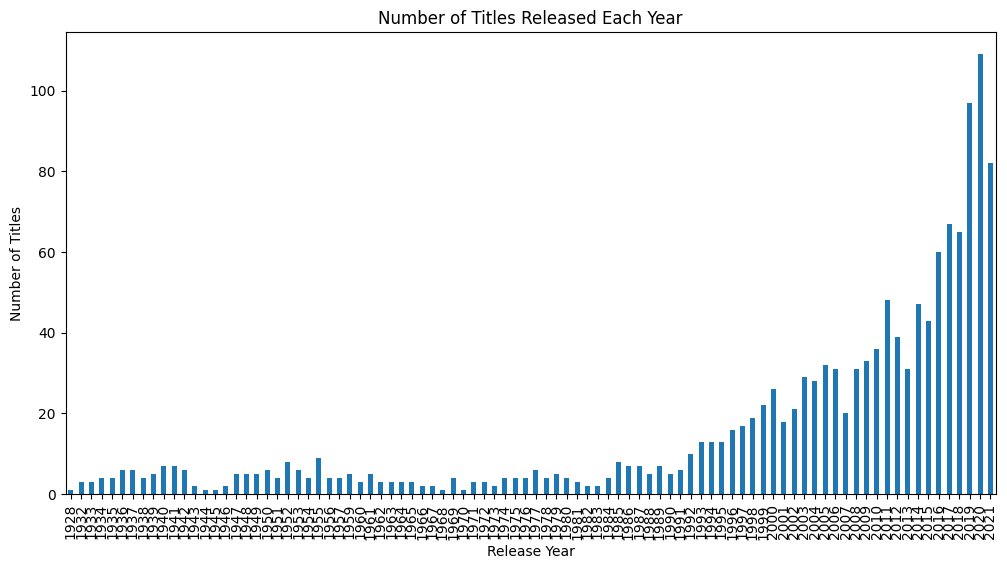

In [3]:
import matplotlib.pyplot as plt

df_release_year = df['release_year'].value_counts().sort_index()
df_release_year.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Titles Released Each Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

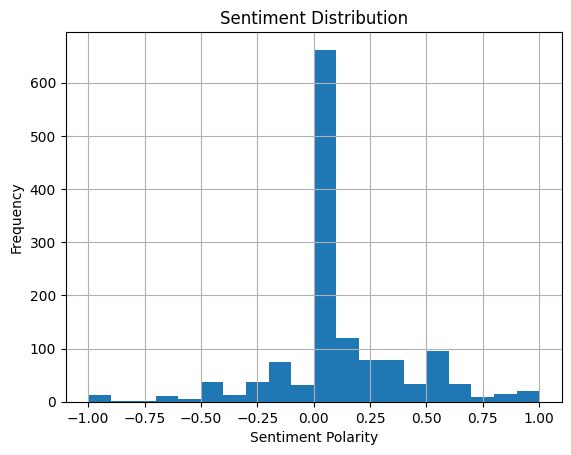

In [4]:
from textblob import TextBlob

df['sentiment'] = df['description'].apply(lambda x: TextBlob(x).sentiment.polarity if pd.notnull(x) else 0)

df['sentiment'].hist(bins=20)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

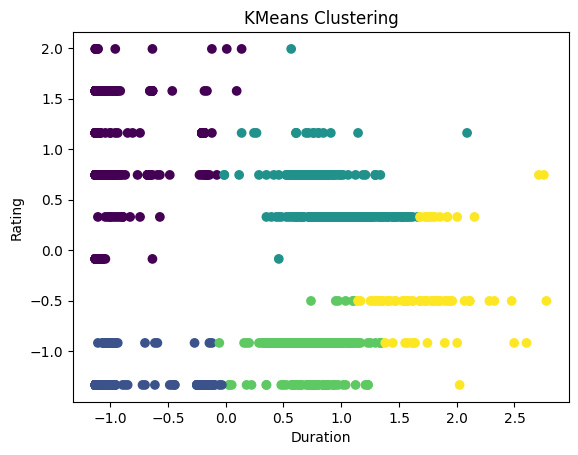

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df['duration'] = df['duration'].astype(str).str.extract(r'(\d+)').astype(float)

features = ['duration', 'rating']
df_features = df[features].dropna().copy()

rating_mapping = {rating: idx for idx, rating in enumerate(df_features['rating'].unique())}
df_features['rating'] = df_features['rating'].map(rating_mapping)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

kmeans = KMeans(n_clusters=5, random_state=42)
df_features['cluster'] = kmeans.fit_predict(df_scaled)

df = df.join(df_features['cluster'], how='left', rsuffix='_cluster')

plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=df_features['cluster'])
plt.title('KMeans Clustering')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()
